In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import ceil

In [3]:
# Funzione sturges per il binnaggio (funziona discretamente bene, ma conviene sempre veerificare)
def sturges (N_eventi) :
    return int (ceil (1 + np.log2 (N_eventi)))      # ceil appartiene alla libreria math, si può usare anche np.ceil (appartiene a numpy)


def rand_range (xmin, xmax) :
    return xmin + (xmax - xmin) * random.random ()


def f_cauchy (M, gamma) :
    ymax = 1.
    x = rand_range (xmin, xmax)
    y = rand_range (0., ymax)
    while (y > (1/np.pi) * (gamma/(x-M)**2 + gamma**2)) :
        x = rand_range (xmin, xmax)
        y = rand_range (0., ymax)
    return x

def f_cauchy_gn (M, gamma) :
    lista_cauchy_i = []
    N_i = []
    medie_cauchy = []
    dev_std_cauchy = []
    ymax = 1.
    for i in np.arange(1, 101, 1) :
        x = rand_range (M - i*gamma, M + i*gamma)
        y = rand_range (0., ymax)
        while (y > (1/np.pi) * (gamma/(x-M)**2 + gamma**2)) :
            x = rand_range (M - i*gamma, M + i*gamma)
            y = rand_range (0., ymax)
        lista_cauchy_i.append (x)
        medie_cauchy.append (np.mean (lista_cauchy_i))
        dev_std_cauchy.append (np.std (lista_cauchy_i))
        N_i.append (i)
    return medie_cauchy, dev_std_cauchy, N_i

In [4]:
M = 0.
gamma = 0.5 
xmin = M - 3*gamma
xmax = M + 3*gamma
N = 2000

In [5]:
lista = []
for i in range (N) :
    lista.append (f_cauchy (M, gamma))
#print (lista)

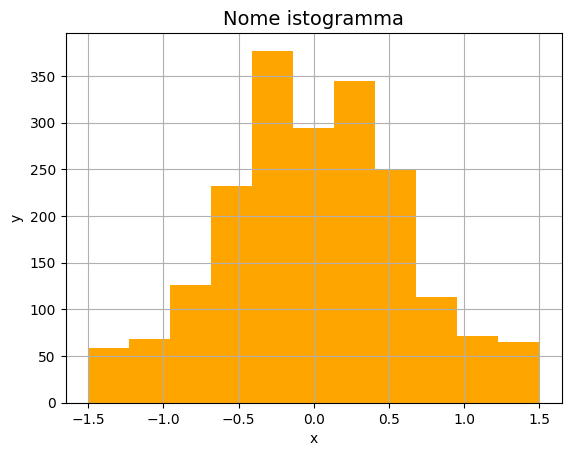

In [6]:
# Istogramma
Nbin = sturges (N)

bin_edges = np.linspace(xmin, xmax, Nbin)         # Regola la dimensione dei bin e Nbin = numero di bin

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (lista, bins=bin_edges, color = 'orange')
ax.set_title ('Nome istogramma', size = 14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.grid ()                                          # Se voglio la griglia
    
plt.savefig ('nome_del_grafico.png')
plt.show ()  

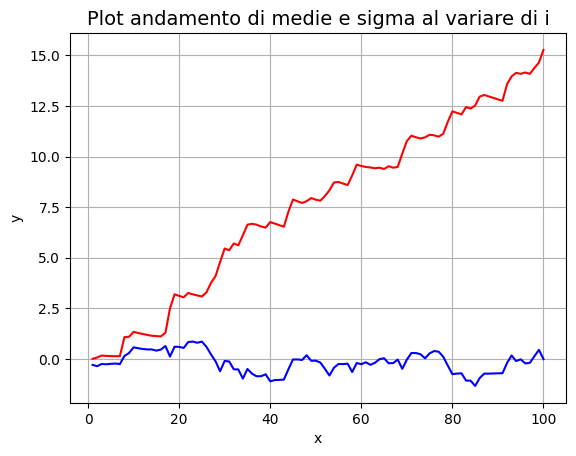

In [7]:
# Punto 4
#print (f_cauchy_gn (M, gamma), "\n", len (f_cauchy_gn (M, gamma)))
#Grafico al variare di i

medie_cauchy, dev_std_cauchy, lista_i = f_cauchy_gn (M, gamma)

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.plot (lista_i, medie_cauchy, color = 'blue')
ax.plot (lista_i, dev_std_cauchy, color = 'red')
ax.set_title ('Plot andamento di medie e sigma al variare di i', size = 14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.grid ()                     # Se voglio la griglia
    
plt.savefig ('Plot.png')
plt.show ()  